<a href="https://colab.research.google.com/github/lasnabunan/Epileptic-Classification/blob/master/Seizure_level6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#INSTALL REQUIREMENTS

In [ ]:
# Mounting Drive to access the Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Changing the Directory to fing the Dataset

!ls /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures
%cd /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures

Main.ipynb	      Seizure_level3.ipynb   values2.csv  values.csv
Non-Seizure	      Seizure_level4.ipynb   values3.csv  values.gsheet
ns.png		      Seizure_level5.ipynb   values4.csv
Seizure		      Seizure_level6.ipynb   values5.csv
Seizure_level1.ipynb  Seizures_Level2.ipynb  values6.csv
/content/drive/My Drive/Seizure/Dataset/Epileptic Seizures


In [ ]:
# Installing pyyeg module for feature extraction

%cd /content/drive/My\ Drive/Seizure/Dataset/EEG\ Signals/pyeeg
!ls
!python setup.py install
%cd /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures

/content/drive/My Drive/Seizure/Dataset/EEG Signals/pyeeg
build  fig2.png     pyeeg	    README.md  setup.py
dist   LICENSE.txt  pyeeg.egg-info  setup.cfg  tests
running install
running bdist_egg
running egg_info
writing pyeeg.egg-info/PKG-INFO
writing dependency_links to pyeeg.egg-info/dependency_links.txt
writing requirements to pyeeg.egg-info/requires.txt
writing top-level names to pyeeg.egg-info/top_level.txt
writing manifest file 'pyeeg.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/hjorth_mobility_complexity.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/__init__.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/fisher_info.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/largest_lyauponov_exponent.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg

In [ ]:
pip install pyrenn

#IMPORT LIBRARIES

FUNCTIONS OF LIBRARIES ARE AS FOLOWS:


1. **PYEEG**: This library is used to extract features from the sub bands of the EEG Signals suchs as svd_entropy.
2. **PYWT**: This library is used to decompose the EEG signals into sub-bands signals which are then used to extract the features
3. **PYRENN**: This library is used to implement the Levenbergh backpropagation algorithm to create ANN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import pyeeg
import tensorflow as tf
import pyrenn as prn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

#LOAD FILES FROM FOLDERS

In [ ]:
# import each and every file

dirA="./Non-Seizure/Set A/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempB = sorted(tempA)          # class: 0     val:  -1

dirB="./Non-Seizure/Set B/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)          # class: 0     val:  -1

dirC="./Non-Seizure/Set C/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)          # class:0       val: -1
    
dirD="./Non-Seizure/Set D/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)          # class: 0        val: -1


dirE="./Seizure/Set E/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)          # class: 1     val:  0

## CREATE SMALL TABLES

In [ ]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_csv(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_csv(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_csv(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_csv(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_csv(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

##CREATE BIG TABLES

In [ ]:
def table(table):
    big_table = None
    for tf in table:
        big_table = pd.concat([big_table, tf],axis=1)
    return big_table

In [ ]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)

head = list(bigB.columns.values)

In [ ]:
print(len(bigB.axes[0]))
print(len(bigB.axes[1]))

4097
100


In [ ]:
bigB.head(10)

A0  A1  A2  A3  A4   A5   A6  A7  ...  A92  A93  A94  A95  A96  A97  A98  A99
0 -24 -55 -36 -14 -58   87  -52   2  ...  -83   98  -53   29  -76   27   -6  -18
1 -22 -48 -40  -5 -78   98  -56  -6  ... -120  178  -33   10 -102    4  -19  -13
2 -17 -48 -36   0 -83  103  -49 -22  ... -123  236  -23  -26  -95    1  -47    0
3 -18 -38 -35   7 -69  108  -51 -17  ... -119  237    0  -81  -65   19  -83    9
4 -19 -23 -22   7 -31   97  -53   6  ...  -93  187   10 -127  -30   43  -99    6
5 -14   0 -15  -4  -4   86  -71  26  ...  -45   94   26 -148    2   57 -104  -20
6  -4  11  -4 -18  10   71  -96  40  ...   17  -13   37 -140   25   54  -81  -67
7  -1  22  13 -15   9   76 -119  42  ...   77 -114   28 -104   40   40  -46 -126
8   7  21  33  -6   1   96 -110  35  ...  103 -185   15  -78   33   19   -1 -162
9  17   3  38   4 -10  100  -90  19  ...  120 -219    1  -78   14   25   30 -165

[10 rows x 100 columns]

##CREATE SUB-MATRIX FOR EACH

In [ ]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [ ]:
matA = creat_mat(bigA)
matB = creat_mat(bigB) # : refers to NON-SEIZURE
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) # :  refers to SEIZURES

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

In [ ]:
matB.shape

(4097, 100)

In [ ]:
matNS_out = np.zeros((1,400))
matNS = np.concatenate((matA, matB, matC, matD), axis= 1)
X_data_NS = np.concatenate((matNS,matNS_out), axis = 0) 
print(X_data_NS.shape)

(4098, 400)


In [ ]:
matS_out = np.ones((1,100))
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape)

(4098, 100)


# VISUALISING THE DATA POINTS
An EEG Signal is shown for both Seizure and Non- Seizure Class with a sample range of 4097.

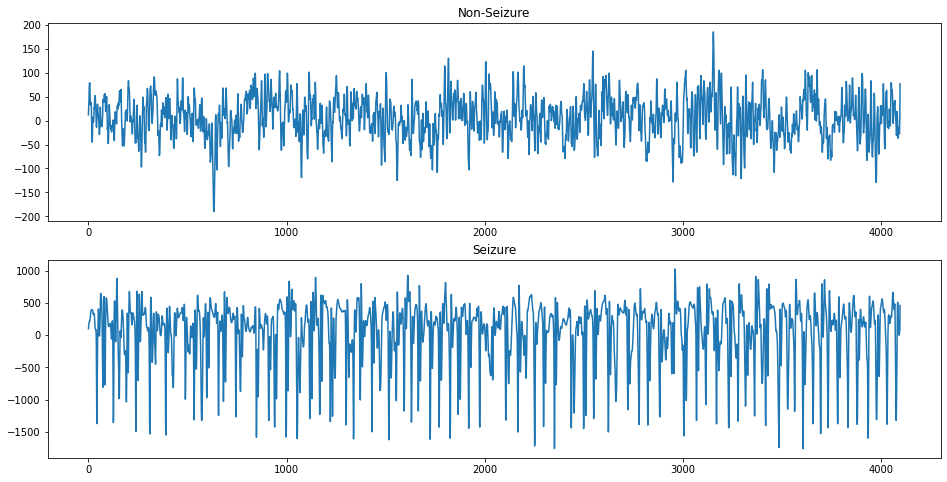

In [ ]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Non-Seizure')
plt.plot(samples,matNS[:,0], label = 'Non-Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label= 'Seizure')
plt.savefig('ns.png')
plt.show()

#APPLYING WAVELET TRANFORM

##DECOMPOSITION OF SIGNAL INTO SUB-BANDS

In [ ]:
final_values = []

In [ ]:
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))

level = 6
w_name = 'bior6.8'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [ ]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD6 = []
temp_cD5 = []
temp_cD4 = []
temp_cD3 = []
temp_cD2 = []
temp_cD1 = []
for i in matNS.T:
  cA,cD6,cD5,cD4,cD3,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
  temp_cD3.append(cD3)
  temp_cD4.append(cD4)
  temp_cD5.append(cD5)
  temp_cD6.append(cD6)
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)
coeff_cD3 = np.array(temp_cD3)
coeff_cD4 = np.array(temp_cD4)
coeff_cD5 = np.array(temp_cD5)
coeff_cD6 = np.array(temp_cD6)

In [ ]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD6_S = []
temp_cD5_S = []
temp_cD4_S = []
temp_cD3_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD6_S,cD5_S,cD4_S,cD3_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD1_S.append(cD1_S)
  temp_cD2_S.append(cD2_S)
  temp_cD3_S.append(cD3_S)
  temp_cD4_S.append(cD4_S)
  temp_cD5_S.append(cD5_S)
  temp_cD6_S.append(cD6_S)
  
coeff_cA_S = np.array(temp_cA_S)
coeff_cD6_S = np.array(temp_cD6_S)
coeff_cD5_S = np.array(temp_cD5_S)
coeff_cD4_S = np.array(temp_cD4_S)
coeff_cD3_S = np.array(temp_cD3_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [ ]:
print(len(coeff_cA_S[0]))
print(coeff_cD6_S.shape)
print(coeff_cD5_S.shape)
print(coeff_cD4_S.shape)
print(coeff_cD3_S.shape)
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)
print(coeff_cA.shape)
print(coeff_cD6.shape)
print(coeff_cD5.shape)
print(coeff_cD4.shape)
print(coeff_cD3.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

80
(100, 80)
(100, 144)
(100, 272)
(100, 527)
(100, 1037)
(100, 2057)
(400, 80)
(400, 80)
(400, 144)
(400, 272)
(400, 527)
(400, 1037)
(400, 2057)


In [ ]:
coeff_cA_total  = np.concatenate([coeff_cA, coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_S])
coeff_cD3_total = np.concatenate([coeff_cD3, coeff_cD3_S])
coeff_cD4_total = np.concatenate([coeff_cD4, coeff_cD4_S])
coeff_cD5_total = np.concatenate([coeff_cD5, coeff_cD5_S])
coeff_cD6_total = np.concatenate([coeff_cD6, coeff_cD6_S])

##VISUALISING THE SUB-BANDS

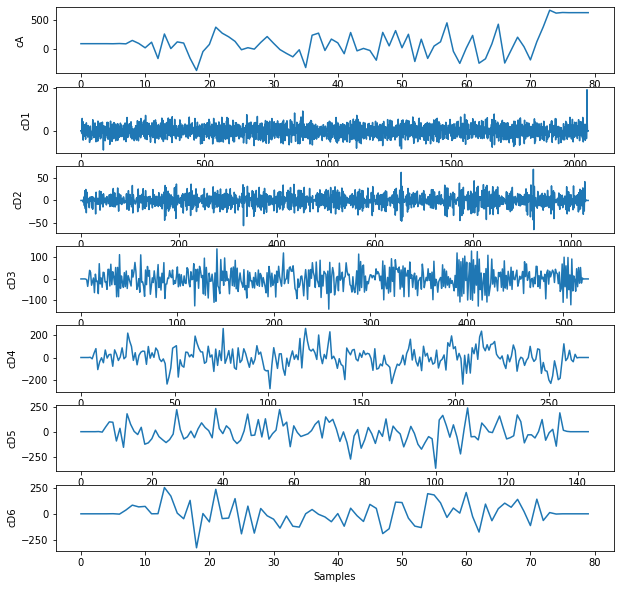

In [ ]:

plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA[0]),1),coeff_cA[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1[0]),1),coeff_cD1[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('cD2')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD2[0]),1),coeff_cD2[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('cD3')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD3[0]),1),coeff_cD3[0,:].T)

plt.subplot(level+1,1,5)
plt.ylabel('cD4')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD4[0]),1),coeff_cD4[0,:].T)

plt.subplot(level+1,1,6)
plt.ylabel('cD5')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD5[0]),1),coeff_cD5[0,:].T)

plt.subplot(level+1,1,7)
plt.ylabel('cD6')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD6[0]),1),coeff_cD6[0,:].T)

plt.show()

# FEATURE EXTRACTION 

## SVD_Entropy, Fisher_Information, PFD

In [ ]:
help(pyeeg.svd_entropy),help(pyeeg.fisher_info),help(pyeeg.pfd)

Help on function svd_entropy in module pyeeg.entropy:

svd_entropy(X, Tau, DE, W=None)
    Compute SVD Entropy from either two cases below:
    1. a time series X, with lag tau and embedding dimension dE (default)
    2. a list, W, of normalized singular values of a matrix (if W is provided,
    recommend to speed up.)
    
    If W is None, the function will do as follows to prepare singular spectrum:
    
        First, computer an embedding matrix from X, Tau and DE using pyeeg
        function embed_seq():
                    M = embed_seq(X, Tau, DE)
    
        Second, use scipy.linalg function svd to decompose the embedding matrix
        M and obtain a list of singular values:
                    W = svd(M, compute_uv=0)
    
        At last, normalize W:
                    W /= sum(W)
    
    Notes
    -------------
    
    To speed up, it is recommended to compute W before calling this function
    because W may also be used by other functions whereas computing it here
  

(None, None, None)

In [ ]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def build_features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
   # DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    #Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (SVD_Entropy,HFD,PFD)

## COMPUTE THE FEATURES OF DATASET
A binary classification for epilectic seizures where class 1 is Non-Seizure class having value (01) and class 2 is Siezure class having value (10)

In [ ]:
# create features of class I and cA
f1_cA_NS    = np.zeros((400,1))
f2_cA_NS    = np.zeros((400,1))
f3_cA_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cA_NS[i,0],f2_cA_NS[i,0],f3_cA_NS[i,0]]=build_features(coeff_cA.T[:,i])

# create features of class I and cD1
f1_cD1_NS    = np.zeros((400,1))
f2_cD1_NS    = np.zeros((400,1))
f3_cD1_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cD1_NS[i,0],f2_cD1_NS[i,0],f3_cD1_NS[i,0]]=build_features(coeff_cD1.T[:,i])
  
# create features of class I and cD2
f1_CD2_NS    = np.zeros((400,1))
f2_CD2_NS    = np.zeros((400,1))
f3_CD2_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD2_NS[i,0],f2_CD2_NS[i,0],f3_CD2_NS[i,0]]=build_features(coeff_cD2.T[:,i])

# create features of class I and cD3
f1_CD3_NS    = np.zeros((400,1))
f2_CD3_NS    = np.zeros((400,1))
f3_CD3_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD3_NS[i,0],f2_CD3_NS[i,0],f3_CD3_NS[i,0]]=build_features(coeff_cD3.T[:,i])

# create features of class I and cD4
f1_CD4_NS    = np.zeros((400,1))
f2_CD4_NS    = np.zeros((400,1))
f3_CD4_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD4_NS[i,0],f2_CD4_NS[i,0],f3_CD4_NS[i,0]]=build_features(coeff_cD4.T[:,i])
    
# create features of class I and cD5
f1_CD5_NS    = np.zeros((400,1))
f2_CD5_NS    = np.zeros((400,1))
f3_CD5_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD5_NS[i,0],f2_CD5_NS[i,0],f3_CD5_NS[i,0]]=build_features(coeff_cD5.T[:,i])

# create features of class I and cD6
f1_CD6_NS    = np.zeros((400,1))
f2_CD6_NS    = np.zeros((400,1))
f3_CD6_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD6_NS[i,0],f2_CD6_NS[i,0],f3_CD6_NS[i,0]]=build_features(coeff_cD6.T[:,i])

/usr/local/lib/python3.6/dist-packages/pyeeg-0.4.4-py3.6.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
# create features of class II (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# create features of class II (SEIZURE and cD1)
f1_cD1_S    = np.zeros((100,1))
f2_cD1_S    = np.zeros((100,1))
f3_cD1_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])

# create features of class II (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0]]=build_features(coeff_cD2_S.T[:,i])
    
# create features of class II (SEIZURE and cD3)
f1_cD3_S    = np.zeros((100,1))
f2_cD3_S    = np.zeros((100,1))
f3_cD3_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD3_S[i,0],f2_cD3_S[i,0],f3_cD3_S[i,0]]=build_features(coeff_cD3_S.T[:,i])
    

# create features of class II (SEIZURE and cD4)
f1_cD4_S    = np.zeros((100,1))
f2_cD4_S    = np.zeros((100,1))
f3_cD4_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD4_S[i,0],f2_cD4_S[i,0],f3_cD4_S[i,0]]=build_features(coeff_cD4_S.T[:,i])

# create features of class II (SEIZURE and cD5)
f1_cD5_S    = np.zeros((100,1))
f2_cD5_S    = np.zeros((100,1))
f3_cD5_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD5_S[i,0],f2_cD5_S[i,0],f3_cD5_S[i,0]]=build_features(coeff_cD5_S.T[:,i])

# create features of class II (SEIZURE and cD6)
f1_cD6_S    = np.zeros((100,1))
f2_cD6_S    = np.zeros((100,1))
f3_cD6_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD6_S[i,0],f2_cD6_S[i,0],f3_cD6_S[i,0]]=build_features(coeff_cD6_S.T[:,i])


/usr/local/lib/python3.6/dist-packages/pyeeg-0.4.4-py3.6.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
cl_2_NS    = np.ones((400,1))
cl_2_S = np.zeros((100,1))
cl_1_S    = np.ones((100,1))
cl_1_NS = np.zeros((400,1))

## CREATE FEATURE AND CLASS MATRIX

In [ ]:
MftNS = np.concatenate([f1_cA_NS, f2_cA_NS, f3_cA_NS, f1_cD1_NS, f2_cD1_NS, f3_cD1_NS, f1_CD2_NS, f2_CD2_NS, f3_CD2_NS, f1_CD3_NS, f2_CD3_NS, f3_CD3_NS, f1_CD4_NS, f2_CD4_NS, f3_CD4_NS, f1_CD5_NS, f2_CD5_NS, f3_CD5_NS, f1_CD6_NS, f2_CD6_NS, f3_CD6_NS, cl_1_NS, cl_2_NS], axis=1)
MftS =  np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f1_cD1_S, f2_cD1_S, f3_cD1_S, f1_cD2_S, f2_cD2_S, f3_cD2_S, f1_cD3_S, f2_cD3_S, f3_cD3_S, f1_cD4_S, f2_cD4_S, f3_cD4_S, f1_cD5_S, f2_cD5_S, f3_cD5_S, f1_cD6_S, f2_cD6_S, f3_cD6_S, cl_1_S, cl_2_S], axis=1)

In [ ]:
FCM_NS = pd.DataFrame(MftNS,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','class1', 'class2'])
FCM_S  = pd.DataFrame(MftS ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','class1', 'class2'])

In [ ]:
FCM_NS.head(4)

f1        f2        f3        f4  ...       f20       f21  class1  class2
0  2.215074  0.908533  0.590049  2.239637  ...  0.988161  0.588554     0.0     1.0
1  1.812602  1.094348  0.585667  2.292064  ...  1.010734  0.587093     0.0     1.0
2  2.238155  0.863923  0.593151  2.272285  ...  0.945090  0.596413     0.0     1.0
3  2.288288  0.862990  0.594761  2.300521  ...  1.018398  0.588554     0.0     1.0

[4 rows x 23 columns]

In [ ]:
FCM_S.head(4)

f1        f2        f3        f4  ...       f20       f21  class1  class2
0  2.203074  0.989755  0.578991  2.301802  ...  0.970153  0.594761     1.0     0.0
1  2.261756  0.981094  0.588554  2.302293  ...  1.027503  0.593151     1.0     0.0
2  1.913951  0.649072  0.587093  2.300412  ...  0.952133  0.601642     1.0     0.0
3  2.089858  0.716451  0.585667  2.300442  ...  0.975131  0.598109     1.0     0.0

[4 rows x 23 columns]

In [ ]:
TotalDataset = pd.concat([FCM_NS,FCM_S],ignore_index=True)

visDat = TotalDataset.drop(["class2"],axis=1)
visDat['class1'] = visDat['class1'].map({1:'seizure',0:'Non-Seizure'})

In [ ]:
print(TotalDataset.shape)

(500, 23)


## KRUSKAL-WALLIS H-TEST 

In [ ]:
f = ['cA', 'cD1', 'cD2','cD3','cD4','cD5','cD6']
H = []
pval = []
from scipy.stats import mstats
for i in range(0,3*(level+1), 3):

  print("Kruskal Wallis H-test test:")

  h, p = mstats.kruskalwallis(MftNS[:,i], MftS[:,i])
  H.append(h)
  pval.append(p)
  if  pval[int(i/(level+1))] < 0.05:
      print("Reject NULL hypothesis - Significant differences exist between groups.")
  if  pval[int(i/(level+1))] > 0.05:
      print("Accept NULL hypothesis - No significant difference between groups.")

H = np.array(H)
pval = np.array(pval)
P_Table = np.concatenate([H.reshape(len(H),1), pval.reshape(len(pval),1)], axis = 1)
P_Tables = pd.DataFrame(P_Table, columns = ['H-value', 'P-Value'], index = f)


Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.


In [ ]:
P_Tables

H-value       P-Value
cA    27.835404  1.320868e-07
cD1  105.540225  9.299093e-25
cD2   14.970060  1.092306e-04
cD3    0.940125  3.322457e-01
cD4    1.718345  1.899062e-01
cD5   32.772697  1.035897e-08
cD6    6.097294  1.353890e-02

##VISUALISING THE FEATURES

In [ ]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")
visDat.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


f1        f2        f3  ...       f20       f21       class1
0  2.215074  0.908533  0.590049  ...  0.988161  0.588554  Non-Seizure
1  1.812602  1.094348  0.585667  ...  1.010734  0.587093  Non-Seizure
2  2.238155  0.863923  0.593151  ...  0.945090  0.596413  Non-Seizure
3  2.288288  0.862990  0.594761  ...  1.018398  0.588554  Non-Seizure
4  2.227792  0.861771  0.587093  ...  0.978908  0.594761  Non-Seizure

[5 rows x 22 columns]

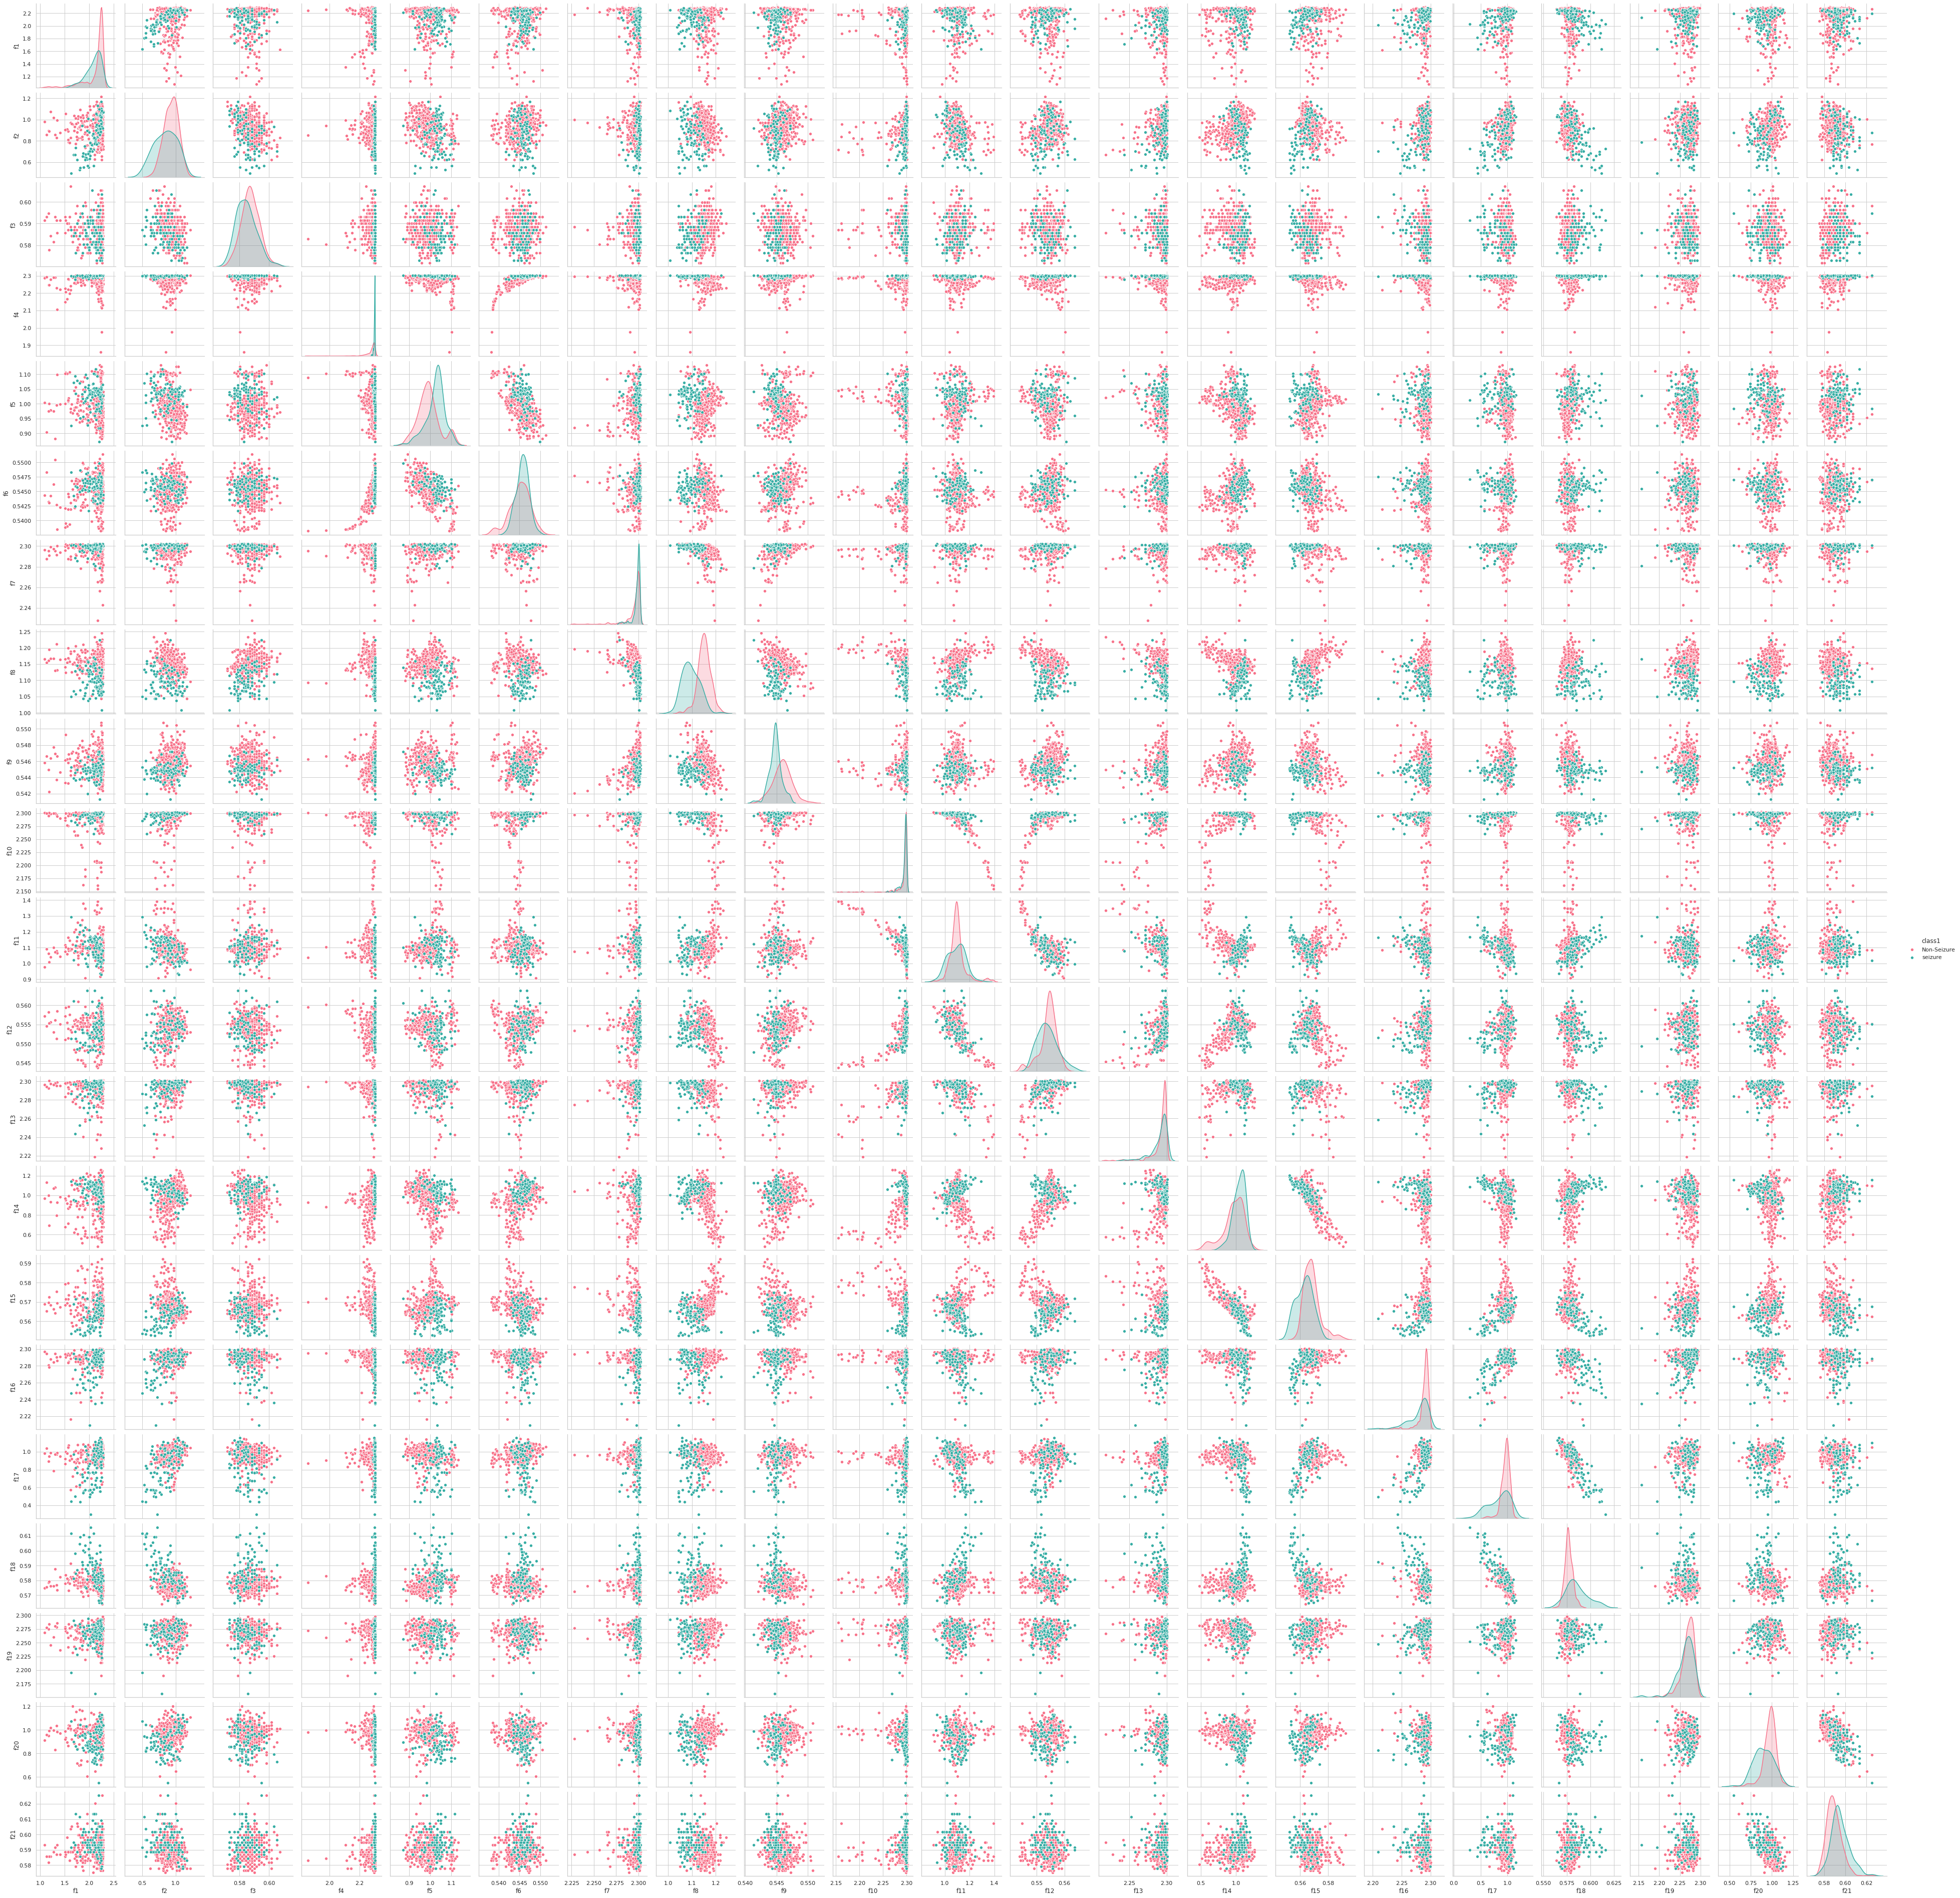

In [ ]:
sbn.pairplot(visDat,hue='class1',palette="husl")
plt.show()

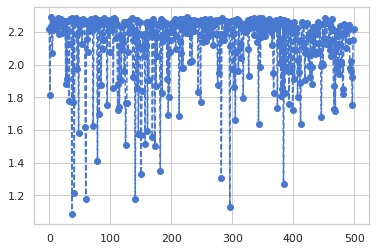

In [ ]:
plt.plot(visDat['f1'],'--o')

#SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21']]
y = TotalDataset[['class1', 'class2']]
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)
print(X_test)

[[ 0.70210469  0.25278255  0.24957436 ... -0.85360993  1.05673247
  -0.99725075]
 [ 0.49676556 -0.12124297  1.51679233 ... -1.44993964 -1.24847181
  -0.4535749 ]
 [ 0.71735098 -0.98403363  0.99081573 ...  0.64378566 -0.08632445
  -0.99725075]
 ...
 [ 0.76812193  0.65617758  0.99081573 ...  0.17193228  0.79507787
  -0.26385751]
 [-0.30231688 -1.23668703 -0.2158924  ...  0.87758236 -1.59603234
   0.33343223]
 [ 0.73389954 -0.3079231   1.25042627 ...  0.94777421 -0.42514471
   1.20393248]]
[[ 0.61267134  0.79090829  0.99081573 ...  0.79985709 -0.22705229
   0.97760458]
 [ 0.63882206  0.11546754  0.49066535 ...  0.63888876 -0.48454805
   1.67577027]
 [-1.8600879   0.38376158 -0.4407249  ... -0.75777275  2.11568393
  -0.63892901]
 ...
 [ 0.75722638 -1.27721849  0.73765691 ...  0.40929412  0.89633463
   1.67577027]
 [ 0.41389396  0.03510393  1.25042627 ... -0.23380574  0.30136866
   0.33343223]
 [ 0.53867922 -0.77503619 -0.2158924  ... -0.22684882  0.39535233
   1.20393248]]


#APPLYING ARTIFICIAL NUERAL NETWORK 
A trained neural network with ten hidden neurons and a single hidden layer is employed to identify the class of a given EEG signal from its features obtained. The ANN consists of linear activation functions and hyperbolic tangent function in its output and hidden layer respectively. The neural network training algorithm used is Levenberg-Marquardt backpropagation algorithm. The output layer consists of two nodes defining each class.

##TRAINING THE NEURAL NETWORK

In [ ]:
net = prn.CreateNN([21,10,2])
net = prn.train_LM(X_train.T,y_train.T,net,verbose=True,k_max=100,E_stop=1e-5)
y_pred_temp = prn.NNOut(X_test.T,net)
y_pred_temp = y_pred_temp.T

Iteration:  0 		Error:  176.11316878498343 	scale factor:  3.0
Iteration:  1 		Error:  60.726259868730494 	scale factor:  0.3
Iteration:  2 		Error:  58.362025805741986 	scale factor:  0.03
Iteration:  3 		Error:  27.72355385663017 	scale factor:  0.03
Iteration:  4 		Error:  16.79673149308597 	scale factor:  0.3
Iteration:  5 		Error:  14.358980223557563 	scale factor:  0.03
Iteration:  6 		Error:  9.006713030938418 	scale factor:  0.03
Iteration:  7 		Error:  7.2674430548359155 	scale factor:  0.03
Iteration:  8 		Error:  5.978693592067625 	scale factor:  0.03
Iteration:  9 		Error:  5.174296595342085 	scale factor:  0.03
Iteration:  10 		Error:  4.559798054522855 	scale factor:  0.03
Iteration:  11 		Error:  4.194750690231653 	scale factor:  0.03
Iteration:  12 		Error:  3.9134743655729456 	scale factor:  0.03
Iteration:  13 		Error:  3.6941510613130117 	scale factor:  0.003
Iteration:  14 		Error:  2.962647304943563 	scale factor:  0.003
Iteration:  15 		Error:  2.770132222355688 	

In [ ]:
print(y_pred_temp)

[[-1.07589774e-04  1.00010759e+00]
 [-2.32117112e-05  1.00002321e+00]
 [-9.33052039e-05  1.00009331e+00]
 [ 2.22172824e-04  9.99777827e-01]
 [ 1.46945333e-05  9.99985305e-01]
 [ 1.35810457e-04  9.99864190e-01]
 [-1.05577588e-03  1.00105578e+00]
 [ 5.13002462e-03  9.94869975e-01]
 [-7.25751651e-05  1.00007258e+00]
 [ 9.07394680e-01  9.26053195e-02]
 [-2.52090821e-04  1.00025209e+00]
 [ 3.21795990e-05  9.99967820e-01]
 [ 1.08692770e+00 -8.69277044e-02]
 [ 1.85603130e-04  9.99814397e-01]
 [ 1.23475377e-04  9.99876525e-01]
 [-2.64347114e-05  1.00002643e+00]
 [ 5.96845563e-01  4.03154437e-01]
 [-1.68778429e-04  1.00016878e+00]
 [ 6.68249593e-05  9.99933175e-01]
 [ 1.00098336e+00 -9.83355109e-04]
 [ 1.02649538e+00 -2.64953775e-02]
 [ 4.79843646e-01  5.20156354e-01]
 [-5.27758742e-05  1.00005278e+00]
 [-4.38780070e-04  1.00043878e+00]
 [ 1.07852302e-05  9.99989215e-01]
 [ 1.17743122e+00 -1.77431225e-01]
 [ 1.50433382e+00 -5.04333820e-01]
 [-7.11577867e-05  1.00007116e+00]
 [-7.34303510e-03  1

In [ ]:
Y_pred = np.zeros((100,1))
for i in range(100):
  Y_pred[i] = np.argmax(y_pred_temp[i,:])

Y_test = np.zeros((100,1))
for i in range(100):
  Y_test[i] = np.argmax(y_test[i,:])

In [ ]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann = confusion_matrix(Y_test, Y_pred)
print(cm_ann)
val = accuracy_score(Y_test, Y_pred)
val

[[16  8]
 [ 1 75]]


0.91

In [ ]:
Y_pred = np.zeros((100,1))
for i in range(100):
  Y_pred[i] = np.argmax(y_pred_temp[i,:])

Y_test = np.zeros((100,1))
for i in range(100):
  Y_test[i] = np.argmax(y_test[i,:])

In [ ]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]]


##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann = confusion_matrix(Y_test, Y_pred)
print(cm_ann)
val = accuracy_score(Y_test, Y_pred)
val

[[16  8]
 [ 1 75]]


0.91

##VISUALISING ROC CURVE


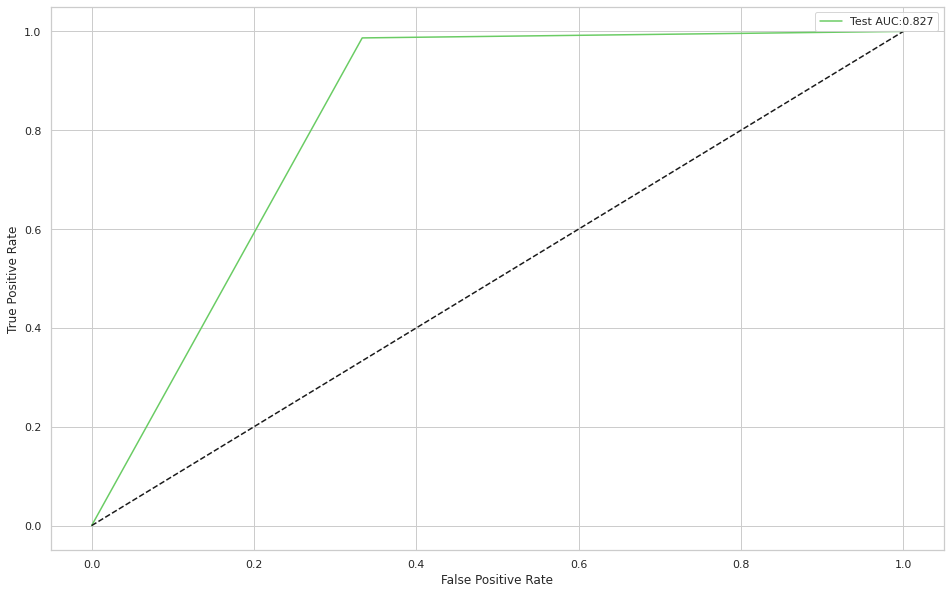

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_pred)
auc_test = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(16,10))
#plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#APPLYING SVM CLASSIFICATION

##TRAINING THE MACHINE LEARNING MODEL


In [ ]:
from sklearn.svm import SVC
cls = SVC(kernel = 'rbf', random_state = 0)
cls.fit(X_train, y_train[:,0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_train_pred_svm = cls.predict(X_train)
Y_pred_svm = cls.predict(X_test)
Y_test_svm = y_test[:, 0]
print(np.concatenate((Y_pred_svm.reshape(len(Y_pred_svm),1), Y_test_svm.reshape(len(Y_test_svm),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]]


##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(Y_pred_svm, Y_test_svm)
print(cm_svm)
accuracy_score(Y_test_svm, Y_pred_svm)

[[76  3]
 [ 0 21]]


0.97

##VISUALISING ROC CURVE


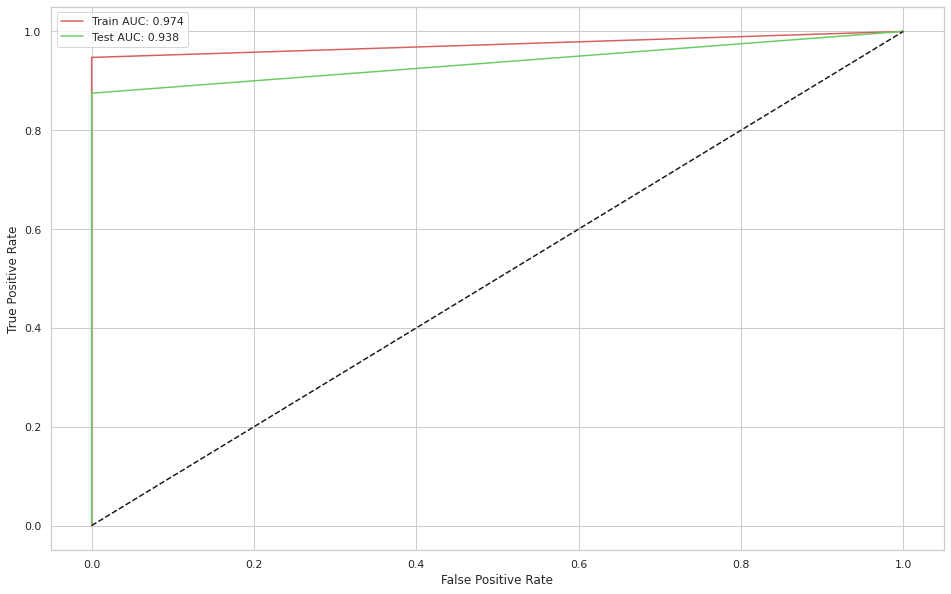

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_svm, tpr_train_svm, thresholds_train = roc_curve(y_train[:,0], Y_train_pred_svm)
auc_train_svm = roc_auc_score(y_train[:,0], Y_train_pred_svm)

fpr_test_svm, tpr_test_svm, thresholds_test = roc_curve(Y_test_svm, Y_pred_svm)
auc_test_svm = roc_auc_score(Y_test_svm, Y_pred_svm)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_svm, tpr_train_svm, 'r-',label ='Train AUC: %.3f'%auc_train_svm)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test_svm, tpr_test_svm, 'g-',label ='Test AUC: %.3f'%auc_test_svm)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# APPLY ANN USING TENSORFLOW
Apply ANN using Tensorflow and ADAM backpropagation Algorithm with sigmoid activation function in the output layer

##TRAINING THE NEURAL NETWORK

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = ann.fit(X_train, y_train[:,0], batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6505 - accuracy: 0.6550
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.6900
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7375
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7950
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.7950
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8375
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4050 - accuracy: 0.8300
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8525
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8725
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3495 - accuracy: 0.8775
Epoch 11/

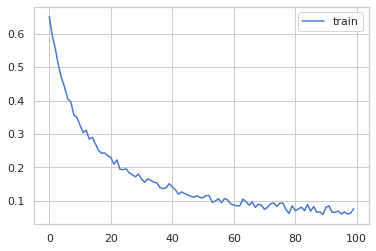

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [ ]:
Y_pred_tf = ann.predict(X_test)
Y_pred_tf = (Y_pred_tf > 0.5)
Y_train_pred_tf = ann.predict(X_train)
Y_train_pred_tf = (Y_train_pred_tf > 0.5)

##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tf = confusion_matrix(Y_pred_tf, Y_test_svm)
print(cm_tf)
accuracy_score(Y_pred_tf, Y_test_svm)

[[75  3]
 [ 1 21]]


0.96

##VISUALISING ROC CURVE


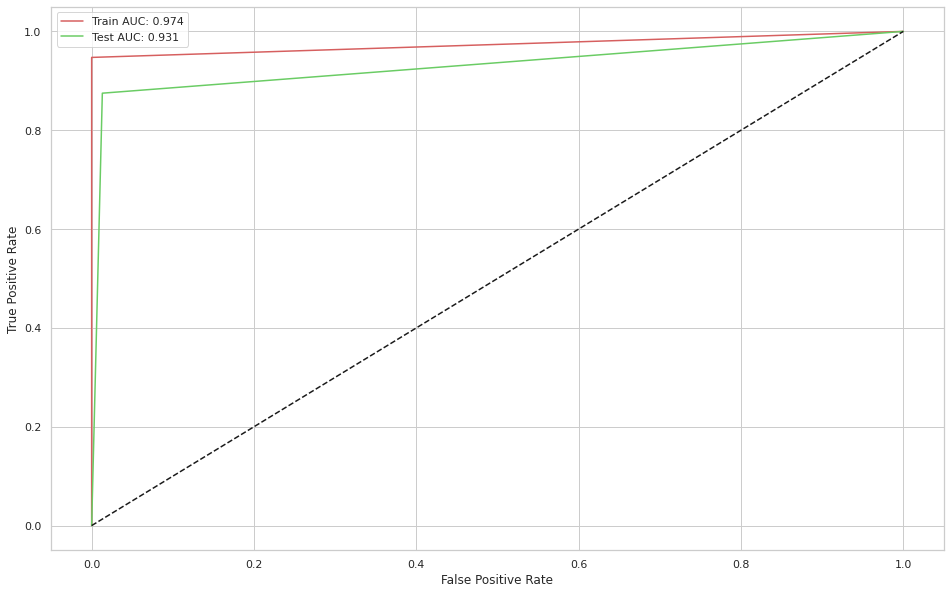

<function print>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_tf, tpr_train_tf, thresholds_train_tf = roc_curve(y_train[:,0], Y_train_pred_tf)
auc_train_tf = roc_auc_score(y_train[:,0], Y_train_pred_tf)

fpr_test_tf, tpr_test_tf, thresholds_test_tf = roc_curve(Y_test_svm, Y_pred_tf)
auc_test_tf = roc_auc_score(Y_test_svm, Y_pred_tf)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_tf, tpr_train_tf, 'r-',label ='Train AUC: %.3f'%auc_train_tf)
plt.plot(fpr_test_tf, tpr_test_tf, 'g-',label ='Test AUC: %.3f'%auc_test_tf)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print

#BUILDING ANN MODEL USING CROSS VALIDATION

## CROSS VALIDATION ON TENSORFLOW MODEL

In [ ]:
def build_classifier():
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann


In [ ]:
from sklearn.model_selection import ShuffleSplit
neural_network = KerasClassifier(build_fn = build_classifier, epochs=100, batch_size=4, verbose=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
accuracies =  cross_val_score(estimator= neural_network, X= X, y=y[:,0],cv=cv)

accuracies

array([0.85000002, 0.87      , 0.85000002, 0.89999998, 0.77999997,
       0.86000001, 0.85000002, 0.83999997, 0.89999998, 0.88999999])

In [ ]:
print(accuracies.mean())
print(accuracies.std())

0.8589999973773956
0.03360059458712435


## CROSS VALIDATION ON SVM MODEL

In [ ]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
accuracies_svm =  cross_val_score(estimator=cls, X= X, y=y[:,0],cv=cv, n_jobs=-1)
accuracies_svm

array([0.82, 0.82, 0.8 , 0.85, 0.77, 0.79, 0.8 , 0.83, 0.83, 0.83])

In [ ]:
accuracies_svm.mean()

0.8140000000000001

## CROSS VALIDATION ON ANN MODEL USING PYRENN


In [ ]:
scores_cv = []
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=0, shuffle = True) 

for train_index, test_index in kf.split(X):
      X_train_cv, X_test_cv = X[train_index], X[test_index] 
      y_train_cv, y_test_cv = y[train_index], y[test_index]

      net = prn.CreateNN([21,10,2])
      net = prn.train_LM(X_train_cv.T,y_train_cv.T,net,verbose=True,k_max=100,E_stop=1e-5)
      y_pred_temp_cv = prn.NNOut(X_test_cv.T,net)
      y_pred_temp_cv = y_pred_temp_cv.T

      Y_pred_cv = np.zeros((50,1))
      for i in range(50):
        Y_pred_cv[i] = np.argmax(y_pred_temp_cv[i,:])

      Y_test_cv = np.zeros((50,1))
      for i in range(50):
        Y_test_cv[i] = np.argmax(y_test_cv[i,:])

      from sklearn.metrics import confusion_matrix, accuracy_score
      cm_ann_cv= confusion_matrix(Y_test_cv, Y_pred_cv)

      val_cv = accuracy_score(Y_test_cv, Y_pred_cv)
      scores_cv.append(val_cv)


Iteration:  0 		Error:  1119.974659086551 	scale factor:  3.0
Iteration:  1 		Error:  831.1922557347608 	scale factor:  0.3
Iteration:  2 		Error:  321.42294104778887 	scale factor:  0.3
Iteration:  3 		Error:  124.57405631445539 	scale factor:  30.0
Iteration:  4 		Error:  116.79674933919829 	scale factor:  30.0
Iteration:  5 		Error:  108.24850882367357 	scale factor:  30.0
Iteration:  6 		Error:  99.84634837137634 	scale factor:  30.0
Iteration:  7 		Error:  93.4542967991176 	scale factor:  30.0
Iteration:  8 		Error:  87.68574434781583 	scale factor:  3.0
Iteration:  9 		Error:  80.30241370039273 	scale factor:  3.0
Iteration:  10 		Error:  74.44849651036412 	scale factor:  30.0
Iteration:  11 		Error:  72.70239770415371 	scale factor:  30.0
Iteration:  12 		Error:  70.13310408654768 	scale factor:  3.0
Iteration:  13 		Error:  68.26853056404565 	scale factor:  3.0
Iteration:  14 		Error:  67.12301689642798 	scale factor:  3.0
Iteration:  15 		Error:  64.57845152512236 	scale facto

In [ ]:
print(scores_cv)

[0.98, 1.0, 0.92, 0.96, 0.98, 0.98, 0.98, 0.96, 0.96, 0.92]


In [ ]:
scores_cv = np.array(scores_cv)
val_mean = scores_cv.mean()
val_mean

0.9639999999999999

## VALUES FOR THE COMPILATION


In [ ]:
final_values.append(val_mean)
print(final_values)

[0.9639999999999999]


In [ ]:
import csv

with open('values6.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(final_values)

In [ ]:
net = prn.CreateNN([21,10,1])
net = prn.train_LM(X_train.T,y_train[:,0].T,net,verbose=True,k_max=100,E_stop=1e-5)
y_pred_temp = prn.NNOut(X_test.T,net)
y_pred_temp = y_pred_temp.T

Iteration:  0 		Error:  327.1331066677533 	scale factor:  3.0
Iteration:  1 		Error:  29.67835422283514 	scale factor:  0.3
Iteration:  2 		Error:  16.117844246243152 	scale factor:  0.03
Iteration:  3 		Error:  13.589205752928828 	scale factor:  0.3
Iteration:  4 		Error:  12.23929522788211 	scale factor:  0.3
Iteration:  5 		Error:  11.28320415518332 	scale factor:  0.03
Iteration:  6 		Error:  7.66333006221428 	scale factor:  0.03
Iteration:  7 		Error:  6.223152737815468 	scale factor:  0.03
Iteration:  8 		Error:  4.346015916900555 	scale factor:  0.03
Iteration:  9 		Error:  3.6598082764358866 	scale factor:  0.03
Iteration:  10 		Error:  3.1273817571951055 	scale factor:  0.03
Iteration:  11 		Error:  2.756031674611387 	scale factor:  0.03
Iteration:  12 		Error:  2.5028931294363916 	scale factor:  0.03
Iteration:  13 		Error:  2.27354578116781 	scale factor:  0.03
Iteration:  14 		Error:  2.047501230361968 	scale factor:  0.03
Iteration:  15 		Error:  1.838659781889759 	scale f

In [ ]:
print(y_pred_temp)

[-3.12237086e-03  4.40766748e-04 -1.40405563e-03  1.14202215e-02
 -3.16023879e-04 -5.29791083e-03  3.20611556e-03  2.36586494e-02
  5.28113323e-03  1.21455043e+00  5.88046832e-03 -2.08886058e-04
  8.74057225e-01 -1.36683573e-03  1.36384946e-03 -2.22676025e-03
  9.56114472e-01 -1.74134743e-03  1.18342761e-02  8.41319334e-01
  1.35333881e+00  1.11611157e+00  1.20819098e-03 -4.09503654e-04
 -3.56455333e-03  2.31831231e+00  9.71851834e-01 -1.82871585e-03
 -8.56714694e-03  2.46025402e-02  1.64842508e+00 -5.21398628e-03
  2.45483789e+00 -2.36851867e-02  4.41771418e-03  6.41702824e-04
  2.87736112e+00 -2.47251972e-03 -2.43721203e-03 -1.19669754e-02
  6.76197229e-03  1.64764472e-02  5.02006410e-01  3.00864752e-01
 -1.11917173e-03  1.40700520e-01  9.09909896e-03  4.90633345e-04
  3.95255354e-02  3.19076378e-02  1.99860032e-03 -5.10764778e-04
 -2.63775411e-03  2.33467418e+00  3.59668435e-02 -7.20031076e-04
 -8.44378507e-03 -7.66908312e-03  1.99043076e-05  4.55674989e-03
  1.05141466e+00  1.60210

In [ ]:
mean_s = np.mean(y_pred_temp)
y_pred_s = (y_pred_temp<mean_s)
mean_s

0.2813880496683228

In [ ]:
print(np.concatenate((y_pred_s.reshape(len(y_pred_s),1), Y_test.reshape(len(Y_test[:,0]),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann_s = confusion_matrix(Y_test[:,0], y_pred_s)
print(cm_ann_s)
val_s = accuracy_score(Y_test[:,0], y_pred_s)
val_s

[[22  2]
 [ 1 75]]


0.97

In [ ]:
scores_cv_s = []
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=0, shuffle = True) 

for train_index, test_index in kf.split(X):
      X_train_cv, X_test_cv = X[train_index], X[test_index] 
      y_train_cv, y_test_cv = y[train_index], y[test_index]

      net = prn.CreateNN([21,10,1])
      net = prn.train_LM(X_train_cv.T,y_train_cv[:,0].T,net,verbose=True,k_max=100,E_stop=1e-5)
      y_pred_temp_cv = prn.NNOut(X_test_cv.T,net)
      y_pred_temp_cv = y_pred_temp_cv.T

      mean_s = np.mean(y_pred_temp_cv)
      y_pred_s = (y_pred_temp_cv<mean_s)

      from sklearn.metrics import confusion_matrix, accuracy_score
      cm_ann_cv= confusion_matrix(Y_test_cv[:,0], y_pred_s)

      val_cv = accuracy_score(Y_test_cv[:,0], y_pred_s)
      scores_cv_s.append(val_cv)


Iteration:  0 		Error:  118.04393345528648 	scale factor:  3.0
Iteration:  1 		Error:  66.09446005937247 	scale factor:  0.3
Iteration:  2 		Error:  53.13844814260984 	scale factor:  0.3
Iteration:  3 		Error:  42.04938978063206 	scale factor:  0.3
Iteration:  4 		Error:  40.97823801049554 	scale factor:  3.0
Iteration:  5 		Error:  39.659593403495414 	scale factor:  0.3
Iteration:  6 		Error:  38.20331068187198 	scale factor:  0.3
Iteration:  7 		Error:  33.23846043633156 	scale factor:  30.0
Iteration:  8 		Error:  32.50446302346665 	scale factor:  30.0
Iteration:  9 		Error:  31.96542871542685 	scale factor:  30.0
Iteration:  10 		Error:  31.57924335427431 	scale factor:  30.0
Iteration:  11 		Error:  31.301352155683272 	scale factor:  30.0
Iteration:  12 		Error:  31.133090169424168 	scale factor:  3.0
Iteration:  13 		Error:  29.54416997027049 	scale factor:  0.3
Iteration:  14 		Error:  28.951013776274007 	scale factor:  3.0
Iteration:  15 		Error:  28.749305605428482 	scale fact

In [ ]:
print(scores_cv_s)

[0.82, 0.86, 0.9, 0.88, 0.78, 0.7, 0.96, 0.82, 0.96, 0.96]


In [ ]:
scores_cv_s = np.array(scores_cv_s)
val_mean = scores_cv_s.mean()
val_mean

0.8640000000000001